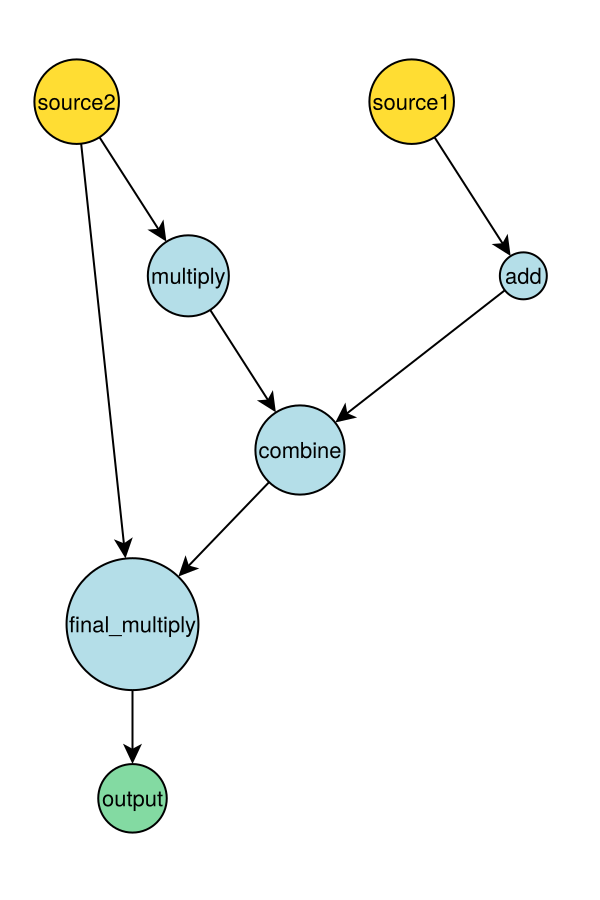

In [1]:
using CairoMakie
using GraphMakie
using Graphs
using LayeredLayouts

function make_graph()
    nodes = ["source1", "source2", "add", "multiply", "combine", "final_multiply", "output"]
    g = SimpleDiGraph(length(nodes))
    add_edge!(g, 1, 3)
    add_edge!(g, 2, 4)
    add_edge!(g, 3, 5)
    add_edge!(g, 4, 5)
    add_edge!(g, 5, 6)
    add_edge!(g, 2, 6)
    add_edge!(g, 6, 7)
    (nodes, g)
end

(nodes, g) = make_graph()

# source layers always at level 1
zero_levels = [i[1] => 1 for i in enumerate(nodes) if i[2] == "source1" || i[2] == "source2" ]

xs, ys, paths = solve_positions(Zarate(), g; force_layer=zero_levels)
xs, ys = -ys, -xs # rotate coordinates by 90°
ys .*= 0.5 # scale the y coordinates
# xs .= 0.4 .* xs # scale the x coordinates
lay = Point.(zip(xs, ys))

function get_node_color(node)
    node = string(node)
    if startswith(node, "source")
        return colorant"#ffdd33" # yellow
    elseif occursin("output", node)
        return colorant"#83daa2" # light green
    else
        return colorant"#b4dee8" # light blue
    end
end

f, ax, p = graphplot(g;
    layout=lay,
    arrow_size=15,
    arrow_shift=:end,
    ilabels=nodes,
    ilabels_fontsize=11,
    node_color=get_node_color.(nodes),
    edge_width=1.0)
x_range, y_range = extrema(xs), extrema(ys)
x_range, y_range = x_range[2] - x_range[1], y_range[2] - y_range[1]
xlims!(ax, minimum(xs) - 0.1x_range, maximum(xs) + 0.1x_range) # add some padding to the x axis
ylims!(ax, minimum(ys) - 0.1y_range, maximum(ys) + 0.1y_range) # add some padding to the y axis
hidedecorations!(ax); hidespines!(ax);
resize!(f, floor(Int, Makie.size(f.scene)[2]*(x_range / y_range)), Makie.size(f.scene)[2]) # adjust width
display(f);